In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';', decimal=',')

In [5]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.33,2.77,12,12.3,9.5,0.057,154,0.454,289.5
1,1,11.05.2000,0.044,3,51.6,14.61,17.75,0.034,352,0.09,1792
2,1,11.09.2000,0.032,2.1,24.5,9.87,13.8,0.173,416,0.2,2509
3,1,13.12.2000,0.17,2.23,35.6,12.4,17.13,0.099,275.2,0.377,1264
4,1,02.03.2001,0,3.03,48.8,14.69,10,0.065,281.6,0.134,1462
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.8,0.038,160,0.726,77.85
2857,22,27.10.2020,0,1.52,0.5,11.26,0.56,0.031,147.2,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0,2.1,0,14.31,3.94,0.034,121.6,0.424,63.49


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2861 non-null   int64 
 1   date       2861 non-null   object
 2   NH4        2858 non-null   object
 3   BSK5       2860 non-null   object
 4   Suspended  2845 non-null   object
 5   O2         2858 non-null   object
 6   NO3        2860 non-null   object
 7   NO2        2858 non-null   object
 8   SO4        2812 non-null   object
 9   PO4        2833 non-null   object
 10  CL         2812 non-null   object
dtypes: int64(1), object(10)
memory usage: 246.0+ KB


In [7]:
df.shape

(2861, 11)

In [8]:
df.describe()

,id
count,2861.000000
mean,12.397064
std,6.084226
min,1.000000
25%,8.000000
50%,14.000000
75%,16.000000
max,22.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.0,8.0,14.0,16.0,22.0


In [ ]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year

In [12]:
df=df.sort_values(by=['date','id'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year
1131,12,2000-01-10,1.5,1.5,9,15.2,7.4,0.32,37.6,0.06,36.7,2000
1428,14,2000-01-10,1.3,1.9,9,15.8,6.3,0.3,40.1,1.61,31.3,2000
1687,15,2000-01-10,1.1,2.1,22,16.1,7,0.28,31.9,0.01,28.6,2000
1945,16,2000-01-10,1.2,2.6,8,16.5,6.7,0.3,34.3,0.02,29.5,2000
820,10,2000-01-11,2.5,2.6,7,8.7,7.7,0.15,40.9,0.04,34,2000


In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [14]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
1131,12,2000-01-10,1.5,1.5,9,15.2,7.4,0.32,37.6,0.06,36.7,2000,1
1428,14,2000-01-10,1.3,1.9,9,15.8,6.3,0.3,40.1,1.61,31.3,2000,1
1687,15,2000-01-10,1.1,2.1,22,16.1,7,0.28,31.9,0.01,28.6,2000,1
1945,16,2000-01-10,1.2,2.6,8,16.5,6.7,0.3,34.3,0.02,29.5,2000,1
820,10,2000-01-11,2.5,2.6,7,8.7,7.7,0.15,40.9,0.04,34,2000,1


In [15]:
df.columns


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [16]:
pollutants = ['CO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'SO2']

In [21]:
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter


In [24]:
print(df.columns.tolist())


['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL', 'year', 'month', 'dayofweek', 'quarter']


In [25]:
features = ['year', 'month', 'dayofweek', 'quarter']


In [26]:
targets = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']


In [27]:
X = df[features]
y = df[targets]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create the model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Train (fit) the model on training data
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [29]:
# Make predictions using the trained model
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate using R2 Score and Mean Squared Error
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: -0.006029528558948277
Mean Squared Error: 12601.735106976992


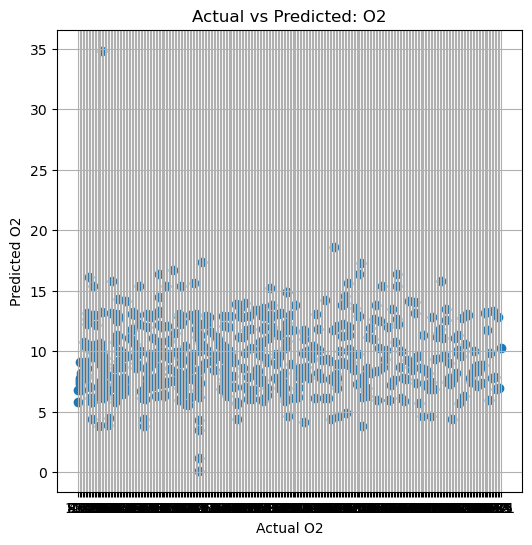

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test['O2'], y_pred[:, y.columns.get_loc('O2')])
plt.xlabel('Actual O2')
plt.ylabel('Predicted O2')
plt.title('Actual vs Predicted: O2')
plt.grid(True)
plt.show()
